In [1]:
# # Glomerulus - GrC connectivity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "../fig_POPGEN/coords_20190614_1e.npz"
f = np.load(fname)

In [3]:
def limit_to_box(x, box):
    mf = x.copy()
    for i, t in enumerate(box):
        mf = mf[mf[:, i] >= t[0], :]
        mf = mf[mf[:, i] <= t[1], :]
    return mf

In [4]:
def print_range(goc):
    print(
        "Current range:\n",
        "x: [{}, {}]\n".format(goc[:, 0].min(), goc[:, 0].max()),
        "y: [{}, {}]\n".format(goc[:, 1].min(), goc[:, 1].max()),
        "z: [{}, {}]".format(goc[:, 2].min(), goc[:, 2].max()),
    )

In [5]:
def fix_coords(x, bbox):
    y = x - 25
    y = limit_to_box(y, bbox)
    print_range(y)
    return y

In [6]:
bbox = [[0, 700], [0, 700], [0, 200]]
grc = fix_coords(f['grc_nop'], bbox)
glo = fix_coords(f['glo'], bbox)

Current range:
 x: [0.0002409080380090245, 699.9790169761062]
 y: [0.007936263447842151, 699.9952781289369]
 z: [0.003539723340455936, 199.99940619898615]
Current range:
 x: [0.011901658401296089, 699.9840840289842]
 y: [0.01332209544780838, 699.9887123544025]
 z: [0.0012346484151777304, 199.9843226012892]


In [7]:
scale_factor = 0.29/0.75

In [8]:
src = grc.copy()
tgt = glo.copy()
src[:, 1] = src[:, 1]*scale_factor
tgt[:, 1] = tgt[:, 1]*scale_factor

In [9]:
from sklearn.neighbors import NearestNeighbors

In [72]:
nn = NearestNeighbors()
nn.fit(tgt)
# conns = nn.radius_neighbors(src, radius=8.7, return_distance=False)
# nconns = np.frompyfunc(lambda x: x.size, 1, 1)(conns).astype(int)
# _ = plt.hist(nconns,np.arange(nconns.max()))
# print('Mean connection = {}'.format(np.mean(nconns))
      
conns = nn.kneighbors(src, n_neighbors=4, return_distance=False)


In [73]:
dendvs = np.vstack([glo[conn,:] - grc[i,:] for i, conn in enumerate(conns)])
dendlens = np.sqrt((dendvs**2).sum(axis=-1))
dendlens

array([13.16509278, 13.57178638,  9.60738532, ...,  7.56854438,
       18.11835131,  7.75657078])

In [74]:
dendlens.mean()

11.015112458343552

In [77]:
dendvs = [glo[conn,:] - grc[i,:] for i, conn in enumerate(conns) if conn.size>0]

In [83]:
dendvs[0][:,0].max()

2.6574632560311784

9.541146179754625±2.6530019695687286


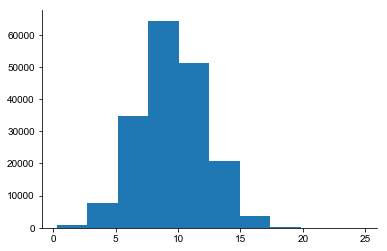

In [86]:
ml_spread = np.array([z[:,0].max()-z[:,0].min() for z in dendvs])

plt.hist(ml_spread)
print('{}±{}'.format(ml_spread.mean(), ml_spread.std()))

22.797251225360878±6.4362907988582965


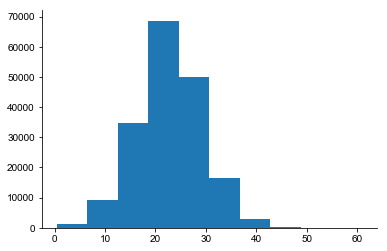

In [88]:
sg_spread = np.array([z[:,1].max()-z[:,1].min() for z in dendvs])

plt.hist(sg_spread)
print('{}±{}'.format(sg_spread.mean(), sg_spread.std()))

(array([ 1150.,  3176.,  5407.,  7743., 10363., 11594., 12596., 13224.,
        13888., 14897., 15525., 16322., 16728., 17812., 18052., 18770.,
        19389., 19682., 20183., 20513., 21381., 21567., 21538., 22014.,
        22202., 21851., 22030., 21771., 21438., 21233., 20706., 20568.,
        19745., 19334., 18813., 18066., 17535., 16859., 15958., 15652.,
        14912., 13883., 13181., 12351., 11588., 10449.,  7716.,  5440.,
         3248.,  1158.]),
 array([-8.68495624e+00, -8.33744220e+00, -7.98992815e+00, -7.64241411e+00,
        -7.29490006e+00, -6.94738602e+00, -6.59987197e+00, -6.25235793e+00,
        -5.90484388e+00, -5.55732984e+00, -5.20981579e+00, -4.86230175e+00,
        -4.51478770e+00, -4.16727365e+00, -3.81975961e+00, -3.47224556e+00,
        -3.12473152e+00, -2.77721747e+00, -2.42970343e+00, -2.08218938e+00,
        -1.73467534e+00, -1.38716129e+00, -1.03964725e+00, -6.92133202e-01,
        -3.44619157e-01,  2.89488866e-03,  3.50408934e-01,  6.97922979e-01,
         1

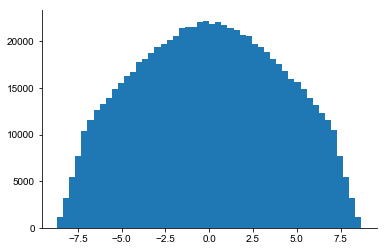

In [41]:
plt.hist(dendvs[:,0], 50)

(array([ 1185.,  3134.,  5230.,  7495., 10331., 11597., 12461., 13043.,
        13808., 14837., 15449., 16200., 16783., 17330., 17894., 18822.,
        19545., 20103., 20406., 21046., 21355., 21971., 21796., 22021.,
        22299., 22218., 22228., 22011., 21730., 21415., 20914., 20464.,
        19821., 19271., 18777., 18064., 17458., 16788., 16182., 15447.,
        14839., 13929., 12989., 12223., 11379., 10091.,  7647.,  5092.,
         2992.,  1091.]),
 array([-8.68515492e+00, -8.33748794e+00, -7.98982097e+00, -7.64215399e+00,
        -7.29448702e+00, -6.94682004e+00, -6.59915307e+00, -6.25148610e+00,
        -5.90381912e+00, -5.55615215e+00, -5.20848517e+00, -4.86081820e+00,
        -4.51315122e+00, -4.16548425e+00, -3.81781727e+00, -3.47015030e+00,
        -3.12248332e+00, -2.77481635e+00, -2.42714938e+00, -2.07948240e+00,
        -1.73181543e+00, -1.38414845e+00, -1.03648148e+00, -6.88814503e-01,
        -3.41147528e-01,  6.51944621e-03,  3.54186421e-01,  7.01853395e-01,
         1

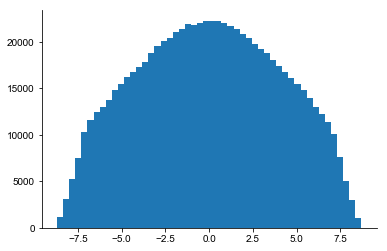

In [42]:
plt.hist(dendvs[:,2], 50)